# Исследование рынка общественного питания в Москве

- Автор:Ирина Севостьянова
- Дата:26/05/2025

### Цели и задачи проекта

**Цель:** Провести исследовательский анализ рынка общественного питания в Москве с выявлением наиболее привлекательного сегмента для развития бизнеса.
    
**Задачи:** 
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
- изучить данные более детально;
- изучить взаимосвязь данных в столбце `district` с другими данными.
4. Сформулировать выводы по проведённому анализу.

### Описание данных

Для анализа поступили данные о  заведениях общественного питания Москвы. Данные состоят из двух датасетов:
- `datasets/rest_info.csv` - содержит информацию о заведениях общественного питания
- `datasets/rest_price.csv` - содержит информацию о среднем чеке в заведениях общественного питания.

Описание датасета `datasets/rest_info.csv`
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение;
- `category` — категория заведения;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах;
- `chain` — число, которое показывает, является ли заведение сетевым:
- `seats` — количество посадочных мест.

Описание датасета `datasets/rest_price.csv`
- `price` — категория цен в заведении;
- `avg_bill` — средняя стоимость заказа в виде диапазона;
- `middle_avg_bill` — число с оценкой среднего чека;
- `middle_coffee_cup` — число с оценкой одной чашки капучино.

### Содержимое проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.
---

## 1. Загрузка данных и знакомство с ними
Загрузим данные о заведениях общественного питания Москвы. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `info_df` и `price_df`.

In [ ]:
# Установим библиотеку phi_k
!pip install phik

# Установим библиотеку jupyter-black
!pip install jupyter-black

     |████████████████████████████████| 1.8 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 66 kB 5.3 MB/s  eta 0:00:01
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3


In [ ]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

# Загружаем библиотеку для дополнительной красоты кода
import jupyter_black

In [ ]:
# Выгружаем данные в переменные info_df и price_df
info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

In [ ]:
# Выводим первые строки датафрейма на экран
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [ ]:
# Выводим информацию о датафрейме
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет ` rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания, их локации и режиме работы.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов соответсвуют общепринятым правилам по написанию солбцов в формате snake case.
- Данные представлены содержат числовые значения, которые хранятся в типах данных `int64` или `float64`. Значения в столбце `chain` представлено целыми числами, а вещественным. Остальные столбцы содержат текстовые данные и представлены в типе данных `object`, что является корректным. Для значений с типом данных `float64` можно снизить разрядность в целях оптимизации памяти.
- Пропуски содержатся в двух столбцах: `hours`, `seats`. Следует дополнительно проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `rest_price.csv`.

In [ ]:
# Выводим первые строки датафрейма на экран
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [ ]:
# Выводим информацию о датафрейме
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке и ценовой составляющей. По аналогии с предыдущим датасетом можно отметить, что:

- Названия столбцов представлены в оптимальном виде snake case. 
- Название столбца `price` не совсем соответствует содержщимся значениям и лучше заменить на `category_price`, так как содержит информациюю о категориях цен и представлены в виде типа данных `object`, что корректно.
- Типы данных для столбцов `middle_avg_bill`, `middle_coffee_cup` определены корректно, так как данные содержат числовые значений и не верный тип данных может привести к ошибке при расчетах, а также могут возникнуть трудости с корректной визуализацией.
- Для столбцов, которые представлены типом данных `object`, такие как `id`, `price`, `avg_bill` также верно определен тип данных.
- Пропуски содержатся почти во всех столбцах датасета: `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`. Некоторые из них можно отнести к типу пропусков MAR — пропуски случайны, но объясняются наблюдаемыми данными обяснить. Например, `middle_avg_bill` содержит число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт» или `middle_coffee_cup` - число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино», соответственно, для других значений столбца avg_bill значения будут отсутствовать.

---

### Промежуточный вывод

Первичное знакомство показывает, что типы данных определены корректно, соответствуют описанию, но почти во всех содержатся пропуски, часть из них можно объяснить данными, которые содержатся в датасете. Типы данных во всех столбцах определены корректно.

### Подготовка единого датафрейма


Каждая строка в этих датасетах — это информация о заведении общественного питания, поэтому такие данные удобно соединить в один датафрейм, который можно использовать для поиска закономерностей в данных. Соединять данные будем с помощью метода `merge()` по столбцу `id` . По умолчанию `merge()`принимает тип присоединения `inner`, но во втором датасете много пропусков, поэтому установим в значение параметра `how = 'left'`.

In [ ]:
# Соединяем данные в единый датафрейм df
df = info_df.merge(price_df, how='left', on='id') 

In [ ]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Данные соединены, и информация обо всех заведениях сохранилась.

## 2. Предобработка данных

Как показало первичное знакомство с данными, в целом тип данных представлен верно. Этот шаг можно было пропустить, так как данных не так много, но cтоит отметить, что в случае, если данные будут увеличиваться в объеме, то для`rating` и `chain` рекомендуем снизить разрядность на `float32` с целью оптимизации использования памяти, упрощения вычислений. Выполним одно преобразование - переведем `chain` в целочисленный тип `int64`, так как данные представлены значениями 1 и 0.

In [10]:
# Перед преобразованием проверить уникальные значения в столбце chain
df['chain'].unique()

array([0, 1])

In [11]:
# Преобразуем тип данных в целочисленный
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')

In [12]:
# Проверим тип данных после преобразования
df['chain'].dtypes

dtype('int8')

При первичном анализе мы обнаружили пропуски в столбце `hours` датасета с заведениями и почти  во всех столбцaх датасета со средним чеком. Узнаем абсолютное и относительное количество пропусков.

In [13]:
# Посчитаем количество пропущенных значений в обеъдиненном датасете df
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [14]:
# Посчитаем долю пропущенных значений в датасете
df.isna().sum() / df.shape[0]

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

Оставим пропуски как есть, так как часть пропусков не случайны и некоторые из них объясняются данными датасета.

В объединенном датафрейме обнаружено:
- 536 пропусков в столбце `hours` — это 6,3% данных. Пропуски могут быть вызваны отсутствием информации о режиме работы заведения, возможно оно недавно открылось или заведения меняли свой режим работы на время праздников и данные не успели обновится. Также пропуски могут быть связаны с технически сбоем. Этот тип пропусков можно отнести к типу MCAR.
- более 40% пропусков имеют столбцы `seats`(3611), `price`(5091), `avg_bill`(4590),`middle_avg_bill`(5257). Отсутствие данных: возможно, информация о посадочных местах, категории цен и среднему чеку не была внесена в систему для определённых заведений. Заведения могли изменить количество посадочных мест или обновить ценовую политику и данные не были обновлены. некоторые заведения могут не иметь фиксированного количества посадочных мест (например, заведения с летним террасой или гибким пространством), что затрудняет запись точных данных. Значения в столбце `seats` могли быть пропущены в связи с тем, что некоторые заведения могут не иметь фиксированного количества посадочных мест (например, заведения с летним террасой или гибким пространством), что затрудняет запись точных данных. Пропуски в столбце `middle_avg_bill` согласно описанию данных изначально формируются не для всех значений, а только тех, которые начинаются с подстроки «Средний счёт» в столбце `avg_bill`, в котором 55% пропущенных значений.
- самое значительное количество пропущенных значений в столбце `middle_coffee_cup` - 7871, что составлятет 95% пропусков. Данный столбец отражает значения, которые начинаются с подстроки «Цена одной чашки капучино» в столбце `avg_bill`.

- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [15]:
# Проверяем полные дубликаты в датасете
df.duplicated().sum()

0

После предобработки данных в датасете нет полных дубликатов строк. Проверим неявные дубликаты — значения по `id` заведения должны быть уникальными, то есть каждая строка в данных — уникальное заведение:

In [16]:
# Проверяем неявные дубликаты
df.duplicated(subset='id').sum()

0

In [17]:
# Проверяем уникальные значения в столбцах
for column in ['name', 'category', 'district']:
    display(f'Уникальные значения в столбце {column}:')
    display(df[column].sort_values().unique())
    display()

'Уникальные значения в столбце name:'

array(['#КешбэкКафе', '+39 Pizzeria Mozzarella bar', '1 Этаж', ...,
       'Ясно', 'Яуза', 'ночной Баку'], dtype=object)

'Уникальные значения в столбце category:'

array(['бар,паб', 'булочная', 'быстрое питание', 'кафе', 'кофейня',
       'пиццерия', 'ресторан', 'столовая'], dtype=object)

'Уникальные значения в столбце district:'

array(['Восточный административный округ',
       'Западный административный округ',
       'Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Центральный административный округ',
       'Юго-Восточный административный округ',
       'Юго-Западный административный округ',
       'Южный административный округ'], dtype=object)

In [18]:
# Проверяем количество значения в столбцах
for x in ['name', 'category', 'district']:
    display(f'Количество уникальных значений в столбце {x}:')
    display(df[x].sort_values().nunique())
    display()

'Количество уникальных значений в столбце name:'

5614

'Количество уникальных значений в столбце category:'

8

'Количество уникальных значений в столбце district:'

9

In [19]:
# Нормализуем данные с названиями заведений в столбце name
df['name'] = df['name'].str.lower()

# Проверим 4 случайные строки
df.sample(4,random_state = 123)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
6166,24c35080ad1c493d9900c2144199596d,лаки сувлаки,быстрое питание,"Москва, Пушкинская набережная",Центральный административный округ,"ежедневно, 10:00–22:00",4.2,1,NaN,NaN,NaN,NaN,NaN
978,392df5692c264457a6fb3650c0d2bd1b,пиццадар,пиццерия,"Москва, улица Лётчика Бабушкина, 9, корп. 1",Северо-Восточный административный округ,"ежедневно, 11:00–23:00",4.3,0,20.0,NaN,NaN,NaN,NaN
4190,2e541999885340728a3eeafc19ebb232,хлеб насущный,булочная,"Москва, улица Арбат, 30/3с1",Центральный административный округ,"пн-пт 07:00–23:00; сб,вс 08:00–23:00",4.3,1,NaN,NaN,NaN,NaN,NaN
6619,77f4523f03da465fa53a058ebc50e35e,kvartal,ресторан,"Москва, проспект Вернадского, 86А",Западный административный округ,пн-сб 11:00–23:00; вс 12:00–23:00,4.2,0,100.0,выше среднего,Средний счёт:1000–2000 ₽,1500.0,NaN


In [20]:
# Проверяем данные на дубликаты
df_count_row = df.shape[0]
display(f'Количество строк в датафрейме:{df_count_row}')

# Проверим количество дубликатов в данных
duplicates_count = df.duplicated().sum() 
display(f'Количество дублирующихся строк:{duplicates_count}')

'Количество строк в датафрейме:8406'

'Количество дублирующихся строк:0'

In [21]:
dup=df.duplicated(subset=['name','address']).sum()
duplicates = df[df.duplicated(subset=['name', 'address'], keep=False)]

display(f'Количество дублирующихся строк по столбцам name и address:{dup}')
display(duplicates)


'Количество дублирующихся строк по столбцам name и address:3'

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,NaN,NaN,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,NaN,NaN,NaN,NaN
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"Москва, проспект Мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,NaN,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","Москва, проспект Мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,NaN,NaN,NaN,NaN
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"Москва, Ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276.0,NaN,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"Москва, Ярцевская улица, 19",Западный административный округ,NaN,4.1,0,276.0,NaN,NaN,NaN,NaN


Обнаружены 3 дублирующие строки, оставим данные как есть, так как на данном этапе нет возможности связаться с заказчиком для уточнения информации. Причина появления неявных дубликатов - изменение режима работы, дублирование информации в столбце hours, которая содержит разный режим работы для одного заведения, а также изменение параметра сетевого и несетевого заведения в виду возможного изменения статуса заведения и организационной структуры управления и категории, например, из булочной переквалифицировались в кафе.

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [22]:
# Проверим какие уникальные значения содержит столбец hours
df['hours'].unique()

array(['ежедневно, 10:00–22:00',
       'пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00',
       'ежедневно, 09:00–22:00', ...,
       'пн-пт 08:30–21:30; сб,вс 09:00–21:30',
       'пн-чт 13:00–22:00; пт,сб 13:00–22:30; вс 13:00–22:00',
       'пн-сб 10:30–21:30'], dtype=object)

In [23]:
# Напишем цикл, который найдет строку "круглосуточно" в столбце со временем работы заведения и запишет данное значений в новый столбец со значение True
df['is_24_7'] = False # зададим исходное значение для нового столбца с булевым типом данных

for index, row in df.iterrows(): # напишем цикл, который будет проходится по индексу и строкам и записывать значения в новый столбец
    if 'ежедневно, круглосуточно' in str(row['hours']): # если строка содержит 'ежедневно, круглосуточно'
        df.at[index, 'is_24_7'] = True # то определяем значение в столбец как True
display(df['is_24_7'])

0       False
1       False
2       False
3       False
4       False
        ...  
8401    False
8402    False
8403     True
8404     True
8405     True
Name: is_24_7, Length: 8406, dtype: bool

In [24]:
# Проверим работу функции, выведем последние 5 строк столбцов 
display(df['hours'].tail(5))
display(df['is_24_7'].tail(5))

8401      ежедневно, 09:00–02:00
8402      ежедневно, 08:00–22:00
8403    ежедневно, круглосуточно
8404    ежедневно, круглосуточно
8405    ежедневно, круглосуточно
Name: hours, dtype: object

8401    False
8402    False
8403     True
8404     True
8405     True
Name: is_24_7, dtype: bool

---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

В результате предобработки данных были выполнены следующие действия:

- В целях оптимизации преобразован тип данных в столбце `chain` на целочисленный;
- Изучены пропуски в данных. Пропуски обнаружились во многих столбцах объдиненного датасета и составляют от 6% до 95% данных столбцов. Учитывая это количество, часть пропусков можно объяснить имеющимися данными, так как были заполнены на основе значений другого столбца и не являются ошибкой в данных. Все пропуски оставили как есть.
- Данные проверили на явные и неявные дубликаты — обнаружено 3 неявных дубликата.


## 3. Исследовательский анализ данных
Проведем исследовательский анализ исходных данных. Посмотрим на количество объектов общественного питания по каждой категории.

In [25]:
# Проверяем распределение данных по значениям столбца с категориями общественного питания
print('Распределение данных по значениям столбца category:')
df['category'].value_counts()

Распределение данных по значениям столбца category:


кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

Для визуального анализа такого распределения используем столбчатые диаграммы. Визуализируем распределение в столбце `category`:

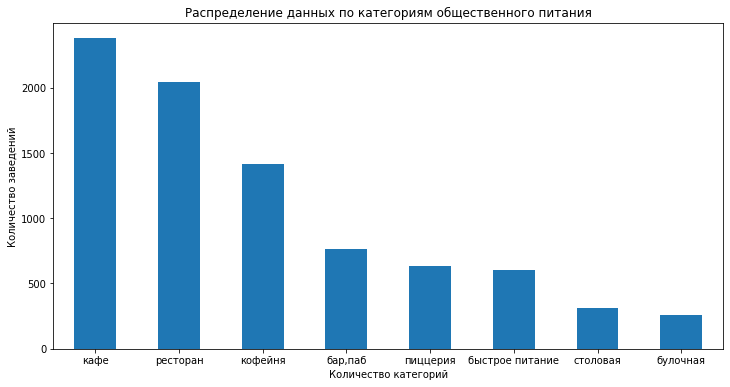

In [26]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение данных по категориям общественного питания'
)

# Настраиваем оформление графика
plt.xlabel('Количество категорий')
plt.ylabel('Количество заведений')

# Выводим график
plt.show()

Из распределения данных по категориям общественного питания Москвы видно, что наибольшее количество заведений - кафе, затем рестораны и кофейня. Булочных и столовых в столице меньше всего.

Чтобы ответить на вопрос, какие административные районы Москвы присутствуют в данных, исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы.

In [27]:
# Считаем количество заведений по району
counts = df['district'].value_counts()

display(counts)

Центральный административный округ         2242
Северный административный округ             900
Южный административный округ                892
Северо-Восточный административный округ     891
Западный административный округ             851
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

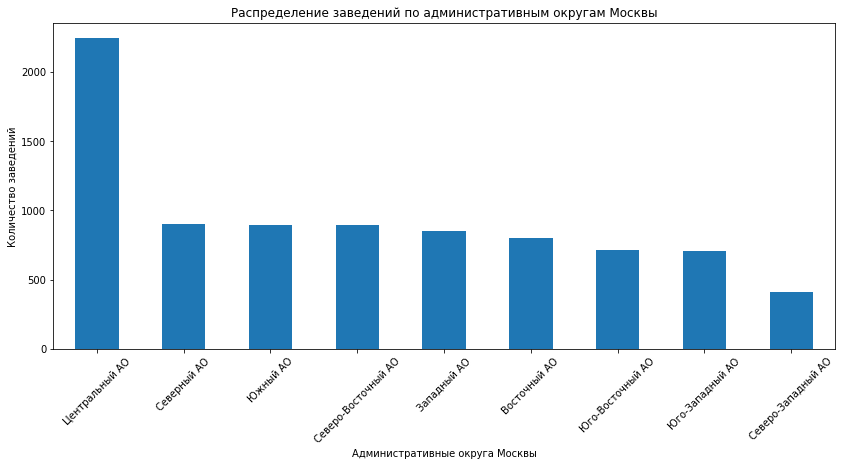

In [28]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(14, 6))

# Сократим наименование административного района
df['district'] = df['district'].str.replace('административный округ','АО')

# Строим столбчатую диаграмму
df['district'].value_counts().plot(
    kind='bar',
    rot=45,
    legend=False,
    title='Распределение заведений по административным округам Москвы'
)

# Настраиваем оформление графика
plt.xlabel('Административные округа Москвы')
plt.ylabel('Количество заведений')

# Выводим график
plt.show()


Из распределения данных по районам общественного питания Москвы видно, что наибольшее количество заведений расположены в Центральном административном округе. По остальным районам распределение почти равномерное, к Северо-Западному АО наблюдается снижение количества заведений.

Отдельно рассмотрим распределение заведений каждой категории в Центральном административном округе Москвы.

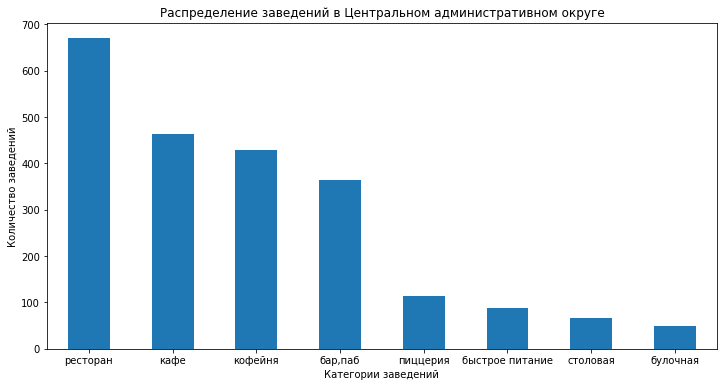

In [29]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Фильтруем данные по центральному району
filtered_df = df[df['district'] == 'Центральный АО']

# Считаем количество заведений в каждой категории
counts = filtered_df['category'].value_counts()

# Строим столбчатую диаграмму
counts.plot(
    kind='bar',
    rot=0,
    legend=False,
    title='Распределение заведений в Центральном административном округе'
)

# Настраиваем оформление графика
plt.xlabel('Категории заведений')
plt.ylabel('Количество заведений')

# Выводим график
plt.show()


Самое распространное заведение общественного питания в Центральном округе Москвы - рестораны, меньше всего столовых и булочных.

---

Отдельно изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Исследуем данные и ответим на следующие вопросы: каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми?

In [30]:
# Посчитаем количество сетевых и несетевых заведений
count_chain = df['chain'].value_counts()
share_chain = df['chain'].value_counts() / df.shape[0]*100.0

display('Количество сетевых и несетевых заведений:')
display(count_chain)
display('Доля сетевых и несетевых заведений:')
display(share_chain)



'Количество сетевых и несетевых заведений:'

0    5201
1    3205
Name: chain, dtype: int64

'Доля сетевых и несетевых заведений:'

0    61.872472
1    38.127528
Name: chain, dtype: float64

Изучим соотношение сетевых и несетевых заведений в целом по всем данным

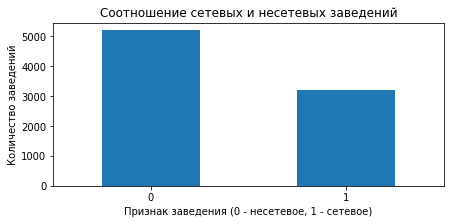

In [31]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df['chain'].value_counts().plot(
                kind='bar', # Тип графика - гистограмма
                rot=0,
                legend=False,
                title='Соотношение сетевых и несетевых заведений')

# Настраиваем оформление графика
plt.xlabel('Признак заведения (0 - несетевое, 1 - сетевое)')
plt.ylabel('Количество заведений')

# Выводим график
plt.show()

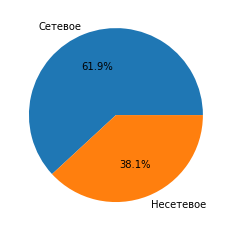

In [32]:
# Построим круговую диаграмму по долям распределения сетевых и несетевых заведений

# Подсчитываем количество сетевых и несетевых заведений
counts = df['chain'].value_counts()

# Построим круговую диаграмму
plt.pie(counts, labels=['Сетевое', 'Несетевое'], autopct='%1.1f%%')

plt.show()


В целом по всем категориям общественного питания во всех районах Москвы преобладает количество несетевых заведений. 

Посмотрим на данные более детальнона долю сетевых заведений в разрезе категорий заведения. Для анализа используем столбчатые диаграммы с распределением сетевых заведений по категориям общественного питания:

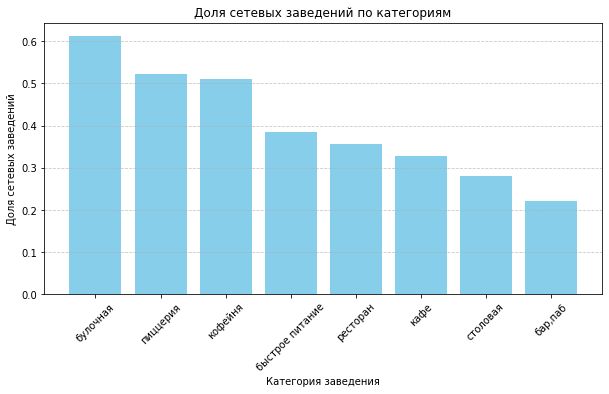

In [33]:
# Группируем по категории и считаем количество сетевых и несетевых заведений
grouped = df.groupby('category')['chain'].value_counts(normalize=True).unstack()

# Переименовываем столбцы для удобства
grouped.columns = ['share_not_chain', 'share_of_chain']

# Выбираем долю сетевых заведений
result = grouped['share_of_chain'].reset_index()

# Сортируем результат по доле сетевых заведений в порядке убывания
result = result.sort_values(by='share_of_chain', ascending=False)

# Строим столбчатую диаграмму
plt.figure(figsize=(10, 5))

plt.bar(result['category'], result['share_of_chain'], color='skyblue')

plt.title('Доля сетевых заведений по категориям')
plt.xlabel('Категория заведения')
plt.ylabel('Доля сетевых заведений')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.show()
 

Изучив распределение сетевых и несетевых заведений в целом по всем категориям и районам Москвы преобладает количество несетевых заведений. Среди сетевых заведений чаще всего встречаются заведения следующих категорий: булочная, кофейня, пиццерия.

Исследуем количество посадочных мест в заведениях. Проверим данные на наличие аномальных значений или выбросов. Если есть, предположим, с чем они могут быть связаны. Приведем для каждой категории заведений наиболее типичное для него количество посадочных мест.


In [34]:
# Выведем общие статистические показатели для столбца
display('Статистические показатели столбца seats:')
df['seats'].describe()

'Статистические показатели столбца seats:'

count    4795.000000
mean      108.421689
std       122.833396
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Построим график распределения для исследования значений на возможные аномальные значения или выбросы в столбце `seats` количества посадочных мест.

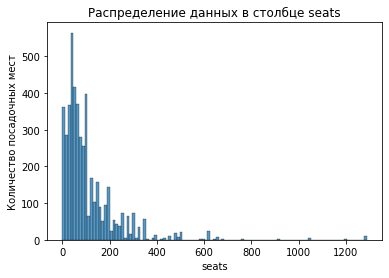

In [35]:
# Построим распределение данных для столбца `seats`
sns.histplot(data=df, x='seats')

# Подписываем и отображаем график
plt.title('Распределение данных в столбце seats')
plt.ylabel('Количество посадочных мест')
plt.show()

На графике наблюдается правосторонняя, или положительная, асимметрия — правый хвост распределения сильно вытянут. Это указывает на присутствие высоких значений, которые оттягивают распределение вправо. Среднее значение превышает медиану — это также подтверждает наличие положительных выбросов, которые оказывают влияние на центральные показатели.

Посмотрим на выбросы с помощью диаграмм размаха.

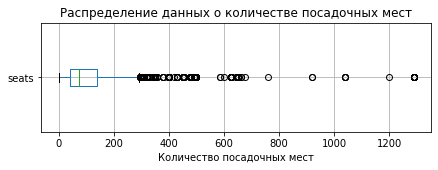

In [36]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце seats
df.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение данных о количестве посадочных мест')
plt.xlabel('Количество посадочных мест')

# Выводим график
plt.show()

Также проверим распределение посадочных мест в зависимости от категории

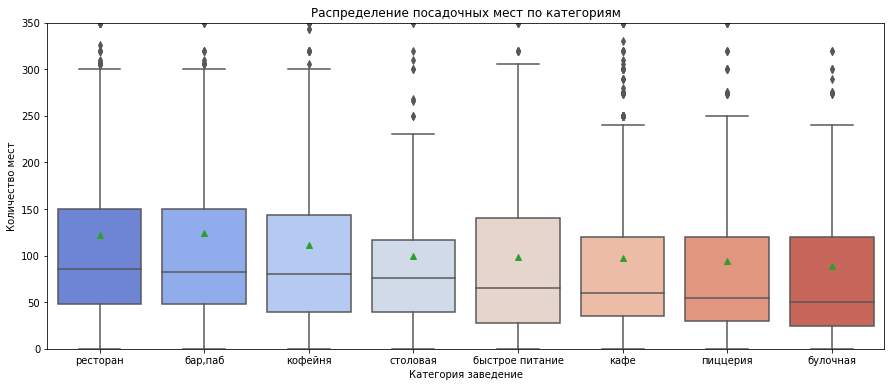

In [37]:
# Группируем данные по категориям и сортируем по медиане
grouped=df.groupby('category')['seats'].median().sort_values(ascending=False).index

plt.figure(figsize=(15,6))
sns.boxplot(x='category',
            y='seats',
            data=df,
            showmeans=True,
            order=grouped,
            palette='coolwarm').set(title='Распределение посадочных мест по категориям',
                                    xlabel='Категория заведение',
                                    ylabel='Количество мест',
                                    ylim=(0,350)
                        )
plt.show()
           

Наблюдается правое смещение в большую сторону значений, медиана смещена вниз, ближе к нижнему квартилю.
Аномальные высокие значения с количеством посадочных мест могут быть связаны с несколькими факторами:
- При вводе данных были допущены ошибки и случайно введено слишком большое число.
- Некоторые заведения могут иметь большое количество посадочных мест, например, рестораны, которые испльзуют как банкетные залы для проведения свадеб или конференций, концертов.
- Возможно, вместо количества посадочных мест было указано размер помещения в квадратных метрах.


Для каждой категории заведений найдем наиболее типичное для него количество посадочных мест.

In [38]:
# Используем метод groupby() для группировки по категориям и расчета медианы для поиска типичного количества мест

typical_seats = df.groupby('category')['seats'].median().reset_index()
display(typical_seats)

,category,seats
0,"бар,паб",82.5
1,булочная,50.0
2,быстрое питание,65.0
3,кафе,60.0
4,кофейня,80.0
5,пиццерия,55.0
6,ресторан,86.0
7,столовая,75.5


Исследуем рейтинг заведений. Визуализируем распределение средних рейтингов по категориям заведений, а также проверим сильно ли различаются усреднённые рейтинги для разных типов общепита.

Для изучения рейтинга заведений рассчитаем среднее значение рейтинга и визуализируем при помощи столбчатой диаграммы:

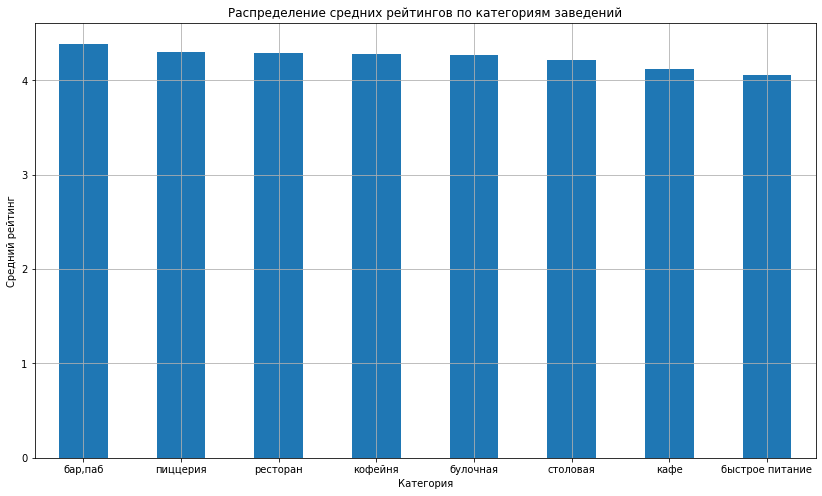

In [39]:
# Группируем данные по категориям и подсчитываем средний рейтинг для них и добавим сортировку
df_copy = df.copy()
average_rating = df_copy.groupby('category')['rating'].mean().sort_values(ascending=False)

# Строим столбчатую диаграмму
average_rating.plot(kind='bar',
                    title='Распределение средних рейтингов по категориям заведений',
                    legend=False,
                    ylabel='Средний рейтинг',
                    xlabel='Категория',
                    rot=0,
                    figsize=(14, 8))

# Выведем сетку
plt.grid()

# Выводим график
plt.show()

Интересно будет сравнивать значения в каждой категории со средним для всех данных — это поможет понять, где показатель уменьшается, а где увеличивается.
Добавим на график линию, которая будет показывать среднее значение рейтинга по всем данным:

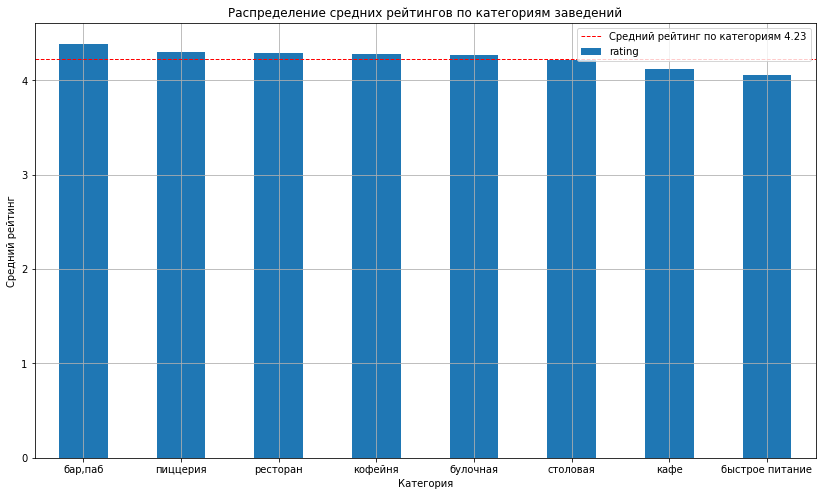

In [40]:
# Группируем данные по категориям и подсчитываем средний рейтинг для них и отсортируем
aveger_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False)

aveger_rating.plot(kind='bar',
                   title=f'Распределение средних рейтингов по категориям заведений',
                   legend=False,
                   ylabel='Средний рейтинг',
                   xlabel='Категория',
                   rot=0,
                   figsize=(14,8)
)

# Рассчитываем среднее значение рейтинга
mean_rating = df['rating'].mean()

# Наносим на график линию с средним значением доли нелояльных клиентов
plt.axhline(mean_rating, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=1, # Ширина линии
            label=f'Средний рейтинг по категориям {round(mean_rating,2)}')

# Выведем сетку и легенду
plt.grid()
plt.legend()


# Выводим график
plt.show()

Теперь на визуализации видны различия среднего рейтинга заведения для каждой категории заведения по отношению к среднему значению в общем.

Средний рейтинг по барам и пабам выше среднего по всем заведениям. По булочным, кофейням, пиццериям и ресторанам также немного выше среднего, по заведения быстрого питания - ниже общего среднего. Но все же усредненные рейтинги не сильно отличаются друг от друга и находятся выше рейтинга со значением 4.

---
Посмотрим также, с какими данными показывают самую сильную корреляцию рейтинги заведений. Построем и визуализируем матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберем самую сильную связь и проверим её.

Для анализа корреляции рейтинга заведения построим матрицу корреляции:

In [41]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df[['category', 'district', 'chain', 'seats', 'price',
                         'is_24_7','rating']].phik_matrix()
# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['chain', 'seats', 'rating']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.220295
district,0.200691
category,0.190003
is_24_7,0.150173
chain,0.108092
seats,0.000000


Ценовая категория показывают большую корреляцию с рейтингом заведения. Это указывает на наличие положительной, но не очень сильной линейной взаимосвязи между этими двумя переменными. Чем выше значение рейтинга, тем выше цена, но эта связь не является очень тесной. Проверим ее, так как phi_k сообщает только о наличии связи между данными.

Перед тем как перейти к дальнейшему анализу, визуализируем результат корреляции с помощью тепловой карты и библиотеки seaborn.

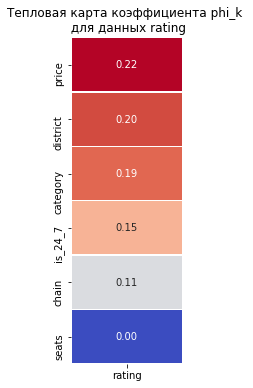

In [42]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции rating с другими данными
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt

# Выводим график
plt.show()

Проанализируем взаимосвязь ценовой категории и рейтинга при помощи диаграммы рассеяния. Для начала выведем уникальные значения в столбце с ценовой категорией и изучим взаимосвязь при помощи коэффициента корреляции Спирмена.

In [43]:
 display(df['price'].sort_values().unique())

array(['высокие', 'выше среднего', 'низкие', 'средние', nan], dtype=object)

In [44]:
# Присвоим числовые значения ценовой категории
df['price_numeric'] = df['price'].map({'высокие':4,'выше среднего':3,'средние':2,'низкие': 1})

# Вычисление корреляции Спирмена
corr = df['rating'].corr(df['price_numeric'], method='spearman')
print(f"Корреляция между рейтингом и ценовой категорий: {corr}")


Корреляция между рейтингом и ценовой категорий: 0.27387694216315855


In [45]:
df['price'].value_counts()

средние          2117
выше среднего     564
высокие           478
низкие            156
Name: price, dtype: int64

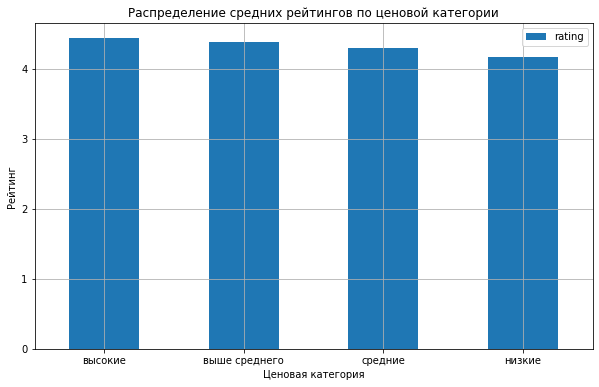

In [46]:
# Группируем данные по категориям и подсчитываем средний рейтинг для них
average_rating = df.groupby('price')['rating'].mean()

# Сортировка данных по убыванию рейтинга
average_rating=average_rating.sort_values(ascending=False)

average_rating.plot(kind='bar',
                   title=f'Распределение средних рейтингов по ценовой категории',
                   legend=False,
                   ylabel='Рейтинг',
                   xlabel='Ценовая категория',
                   rot=0,
                   figsize=(10,6)
)

# Выведем сетку и легенду
plt.grid()
plt.legend()


# Выводим график
plt.show()

Взаимосвязь между средним рейтингом и ценовой категорией низкая, но наблюдается увеличение среднего рейтинга для ценовой категории "высокие" и незначиельное снижение рейтинга для заведений с ценовой категорией "низкие".

Для построения графика рассеяния преобразуем категории в числовые значения, чтобы наглядно отобразить взаимосвязь между ценовой категорией и рейтингом.

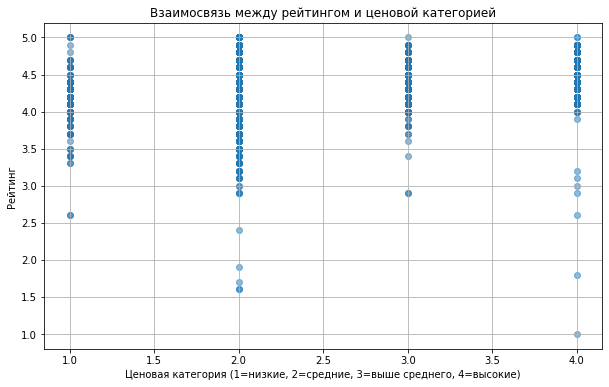

In [47]:
# Преобразуем категориальные данные в числовые
df['price_numeric'] = df['price'].map({'низкие': 1, 'средние': 2, 'выше среднего': 3, 'высокие': 4})

# Строим график рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(df['price_numeric'], df['rating'], alpha=0.5)


plt.title('Взаимосвязь между рейтингом и ценовой категорией')
plt.xlabel('Ценовая категория (1=низкие, 2=средние, 3=выше среднего, 4=высокие)')
plt.ylabel('Рейтинг')
plt.grid(True)
plt.show()


Точки данных образуют горизонтальную линию, можно сделать вывод, что корреляция между переменными низкая - изменения одной переменной не приводят к изменениям другой переменной.

Сгруппируем данные по названиям заведений и найдим топ-15 популярных сетей в Москве. Для них посчитаем значения среднего рейтинга, а также найдем к каким категориям данные заведения относятся.

Для начала сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве.

In [48]:
# Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве.
top=df['name'].value_counts().head(15)

# Выведем топ15
display(f'Топ-15 популярных сетей в Москве:')
display(top)


'Топ-15 популярных сетей в Москве:'

кафе                                   189
шоколадница                            120
домино'с пицца                          77
додо пицца                              74
one price coffee                        72
яндекс лавка                            69
cofix                                   65
prime                                   50
хинкальная                              44
шаурма                                  43
кофепорт                                42
кулинарная лавка братьев караваевых     39
теремок                                 38
чайхана                                 37
ресторан                                34
Name: name, dtype: int64

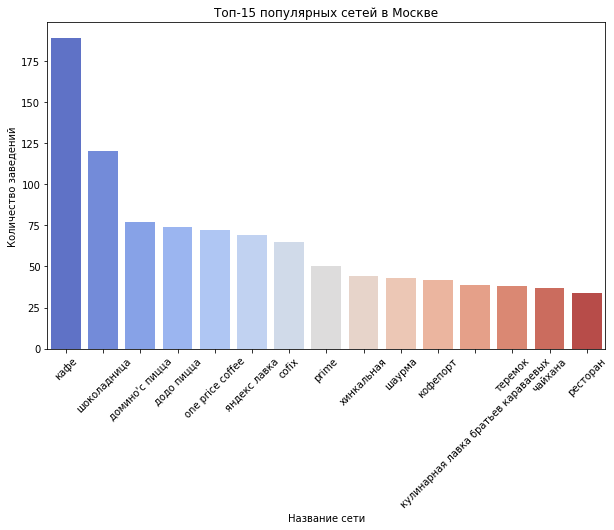

In [49]:
# Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве
top_name = df['name'].value_counts().head(15)

# Создаем график
plt.figure(figsize=(10, 6))
sns.barplot(x=top_name.index, y=top_name, palette='coolwarm')

# Подписываем и отображаем график
plt.title('Топ-15 популярных сетей в Москве')
plt.xlabel('Название сети')
plt.ylabel('Количество заведений')
plt.xticks(rotation=45)  # Поворачиваем метки по оси X для лучшего отображения
plt.show()

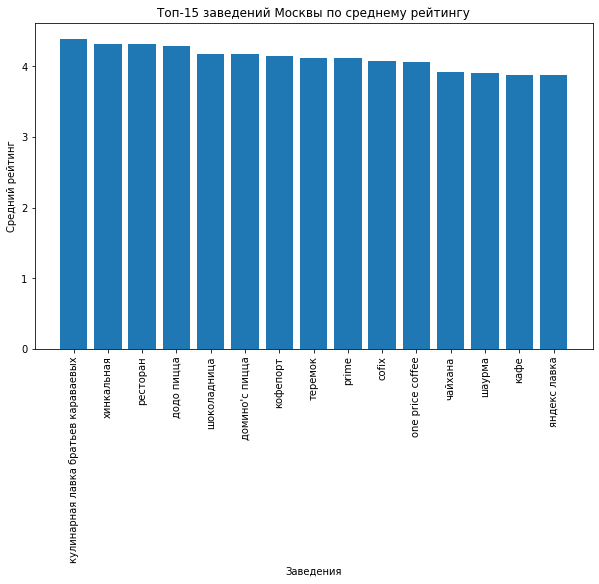

In [50]:
# Подсчитаем топ15
# Находим топ-15 популярных заведений
top_name = df['name'].value_counts().head(15).index

# Фильтруем исходный датасет по топ-15 заведениям
top_df = df[df['name'].isin(top_name)]

# Группируем и находим средний рейтинг для каждого заведения из топ-15
average_rating = top_df.groupby('name')['rating'].mean().sort_values(ascending=False)

# Сортируем по среднему рейтингу и строим график
plt.figure(figsize=(10, 6))
plt.bar(average_rating.index, average_rating)

plt.xlabel('Заведения')
plt.ylabel('Средний рейтинг')
plt.title('Топ-15 заведений Москвы по среднему рейтингу')
plt.xticks(rotation=90)  # Поворот названий заведений для лучшего отображения

plt.show()


Среди топ 15 наибольший рейтинг наблюдается у следующих заведений: кулинарная лавка братьев караваемых, хинкальная, ресторан и додо пицца. Но стоит отметить, что значения среднего рейтинга популярных заведений Москвы отличаются незначительно.

In [51]:
top_name = df['name'].value_counts().head(15).index
filtered_df = df[df['name'].isin(top_name)]

# Считаем количество заведений каждой сети
counts = df['name'].value_counts().loc[top_name]

# Группируем по названию и считаем средний рейтинг и категорию (предполагаю, что категория одинаковая для всей сети)
grouped = filtered_df.groupby('name').agg({'category': lambda x: x.mode()[0],'rating': 'mean','name': 'count'})
grouped = grouped.rename(columns={'name': 'counts', 'rating': 'avg_rating'})

# Сортируем по количеству заведений (популярности)
grouped = grouped.sort_values('counts', ascending=False).head(15)

display(grouped)


,category,avg_rating,counts
name,,,
кафе,кафе,3.880952,189
шоколадница,кофейня,4.177500,120
домино'с пицца,пиццерия,4.171429,77
додо пицца,пиццерия,4.286486,74
one price coffee,кофейня,4.069444,72
яндекс лавка,ресторан,3.872464,69
cofix,кофейня,4.075385,65
prime,ресторан,4.116000,50
хинкальная,кафе,4.322727,44


Среди топ 15 заведений встречаются такие категории как рестораны, кофейни, пиццерии и кафе.

Изучим вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируем цены в Центральном административном округе и других, а также проведем анализ влияния удалённость от центра на цены в заведениях.

In [52]:
# Изучаем статистические показатели столбца score
display('Статистические показатели столбца middle_avg_bill:')
df['middle_avg_bill'].describe()

'Статистические показатели столбца middle_avg_bill:'

count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

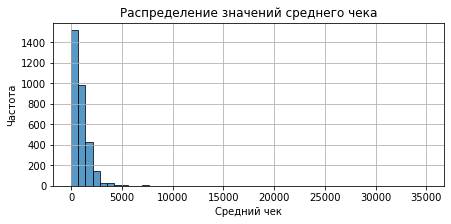

In [53]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df['middle_avg_bill'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=50, # Устанавливаем количество корзин - всего 25
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений среднего чека')
plt.xlabel('Средний чек')
plt.ylabel('Частота')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

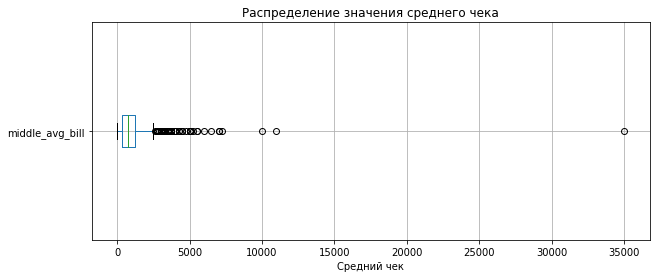

In [54]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 4))

# Строим диаграмму размаха значений в столбце score
df.boxplot(column='middle_avg_bill', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значения среднего чека')
plt.xlabel('Средний чек')

# Выводим график
plt.show()

Распределение значений в столбце `middle_avg_bill` ассимитрично, скошено вправо, минимальное значение - 0, максимальное - 35.000. Среднее значение соответствует По "ящику с усами" видно, что выбросами можно считать значения свыше 2000. Однако высокий средний чек может быть характерен для заведений, который проводят мероприятия на большое количество посадочных мест.


Проанализируем цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях?

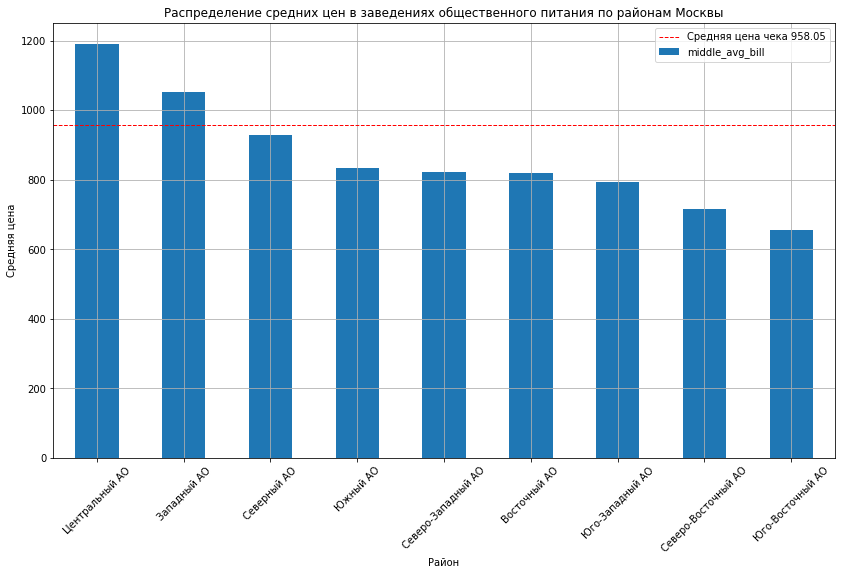

In [55]:
# Группируем данные по категориям и подсчитываем средний рейтинг для них и добавим сортировку
aveger_rating = df.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=False)

aveger_rating.plot(kind='bar',
                   title=f'Распределение средних цен в заведениях общественного питания по районам Москвы',
                   legend=False,
                   ylabel='Средняя цена',
                   xlabel='Район',
                   rot=45,
                   figsize=(14,8)
)

# Рассчитываем среднее значение рейтинга
mean_rating = df['middle_avg_bill'].mean()

# Наносим на график линию с средним значением доли нелояльных клиентов
plt.axhline(mean_rating, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=1, # Ширина линии
            label=f'Средняя цена чека {round(mean_rating,2)}')

# Выведем сетку и легенду
plt.grid()
plt.legend()


# Выводим график
plt.show()

Самый высокий средний чек наблюдается в Центральном районе. Также стоит отметить зависимость категории цен и расположения заведени общественного питания. Чем дальше расположено заведения от центра, тем ниже средняя стоимость цены. Это может быть связано с тем, что в Центральном районе дороже аренда помещения, высокими рейтингам заведений, а также высокой посещаемостью и проходимостью.

---

### Промежуточный вывод


Анализ взаимосвязи данных показал, что:

- Наибольшее количество заведений имеет средий рейтинг - 2117, выше среднего - 564, высокие - 478, низкие - 156.
- Наибольшую корреляцию (22%) с рейтингом заведения показала стоимость, но по результатам более детального анализа выявлено, что рейтинг заведения незначительно влияет на категорию цен. Как показали данные, средний рейтинг для всех ценовых категорий примерно одинаковый, имеют незначительные отклонения для категорий "низкий" в меньшую сторону и "высокий" в большую.
- Процент сетевых заведений около 62%, тогда как процент несетевых заведений составляет 38%, среди которых заведений, попавшие в топ 15 по популярности.
- В топ 15 заведений попали такие категории, как рестораны, кофейни, пиццерии и кафе.
- Средний чек по всем категориям заведений составляет примерно 958 рублей, с медианой 749, данные асимметричны и имеют положительный скос вправо. В наборе данных есть выбросы и аномальные значения, наприер, такие как средний чек на 35.000.
- Распределение средних цен показало зависимости: чем ближе к центральному району, тем выше средний чек.

## Подведём итоги

В ходе исследования проанализировали данные 8406 заведений общественного питания в Москве.

### Общая информация о заведениях

Исследовательский анализ данных позволил сформировать общее представление рынка общественного питания:

- Из 8406 проанализированных заведений наибольшее количество расположены в Центральном административном округе (2242).

- Самое распространная категория заведения общественного питания в Центральном округе Москвы - ресторан.

- Наибольшее количество несетевых заведений - 62% (5201 заведений), присутствие сетевых составляет - 38% (3205).

### Факторы, влияющие среднюю стоимость и чек

На значение средней стоимости положительно влияют несколько факторов: рейтинг и район. В Центральном районе наблюдается наиболее высокий средний чек и рейтинг заведения.
    
Средний рейтинг:

- чем выше средний чек, тем выше средний рейтинг заведения;
- на средний рейтинг незначительно влияет категория заведения: для баров этот показатель немного выше (примерно 4.6);
для столовых незначительно ниже среднего (4), остальные категории в пределах среднего значения рейтинга (4.2).

В топ-15 по количеству встречаемость присутствуют заведения различных категорий: кафе, кофейня, рестораны, кофейни, пиццерии. Но стоит отметить, что рейтинг для данных категорий не самый высокий.

### Рекомендации

В качестве рекомендаций стоит обратить внимание на несетевые заведения в Центральном районе.
Дополнительно можно провести более детальный анализ заведений с рейтингом выше среднего и высоким, чтобы выделить отдельну категорию заведений.
